In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/nsattigeri/Downloads/Material FV/Material FV/Machine Learning/Projects/Linear Regression P1/Sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
nulldf = df[df['Item_Weight'].isnull()]

In [8]:
nulldf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('NA')
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
a = df.groupby('Item_Fat_Content', as_index=False)['Item_Identifier'].count()
a

,Item_Fat_Content,Item_Identifier
0,LF,316
1,Low Fat,5089
2,Regular,2889
3,low fat,112
4,reg,117


In [11]:
import numpy as np
df['Item_Fat_Content'] = np.where(df['Item_Fat_Content']=='LF', 'Low Fat', df['Item_Fat_Content'])
df['Item_Fat_Content'] = np.where(df['Item_Fat_Content']=='low fat', 'Low Fat', df['Item_Fat_Content'])
df['Item_Fat_Content'] = np.where(df['Item_Fat_Content']=='reg', 'Regular', df['Item_Fat_Content'])

In [12]:
df['Count'] = 1

In [13]:
Fat_Content = df.groupby('Item_Fat_Content', as_index=False)['Count'].sum()
Fat_Content

,Item_Fat_Content,Count
0,Low Fat,5517
1,Regular,3006


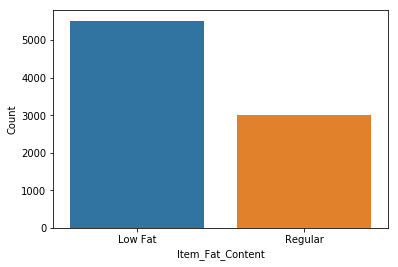

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x = 'Item_Fat_Content', y = 'Count', data=Fat_Content)
plt.show()

In [16]:
item_type = df.groupby('Item_Type', as_index=False)['Count'].sum()
item_type.sort_values('Count', ascending=False)

,Item_Type,Count
6,Fruits and Vegetables,1232
13,Snack Foods,1200
9,Household,910
5,Frozen Foods,856
4,Dairy,682
3,Canned,649
0,Baking Goods,648
8,Health and Hygiene,520
14,Soft Drinks,445
10,Meat,425


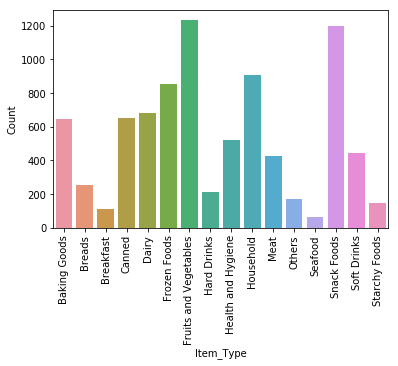

In [17]:
ax2 = sns.barplot(x = 'Item_Type', y = 'Count', data = item_type)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

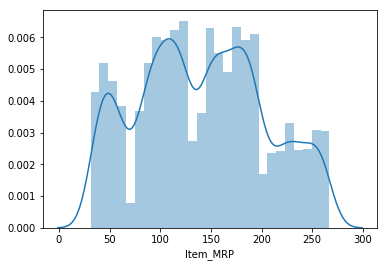

In [18]:
ax3 = sns.distplot(df['Item_MRP'])

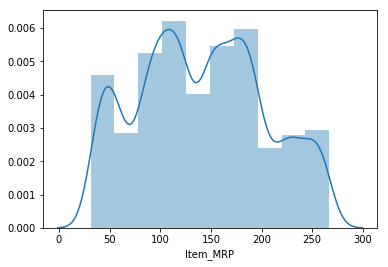

In [19]:
ax3 = sns.distplot(df['Item_MRP'], bins=10)

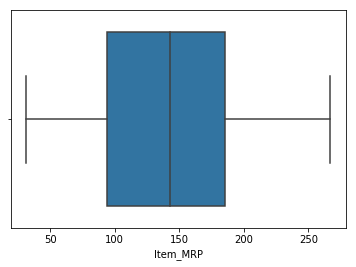

In [20]:
box = sns.boxplot(df['Item_MRP'])

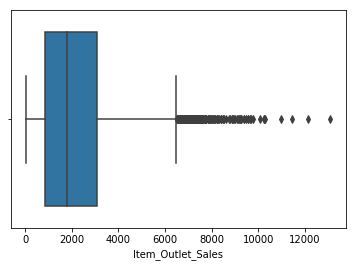

In [22]:
box2 = sns.boxplot(df['Item_Outlet_Sales'])

In [ ]:
import numpy as np
df['Outilers'] = 0
df['Outliers']= np.where(df['Item_Outlet_Sales']>(q3 + 1.5*inter_qr), 1, df['Outliers'])
df['Outliers']= np.where(df['Item_Outlet_Sales']<(q1 - 1.5*inter_qr), 1, df['Outliers'])
df.head()


In [40]:
from scipy.stats import iqr

q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
inter_qr = iqr(df['Item_Outlet_Sales'])
print q1
print q3
print inter_qr

834.2474
3101.2964
2267.049


In [46]:
df['Outliers'] = np.where(df['Item_Outlet_Sales']>(q3+1.5*inter_qr), 1, df['Outliers'])
df['Outliers'] = np.where(df['Item_Outlet_Sales']<(q1-1.5*inter_qr), 1, df['Outliers'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Count,Outliers
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0


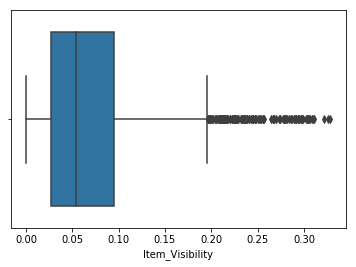

In [44]:
box2 = sns.boxplot(df['Item_Visibility'])

In [45]:
vq1 = df['Item_Visibility'].quantile(0.25)
vq3 = df['Item_Visibility'].quantile(0.75)
vinter_qr = iqr(df['Item_Visibility'])
print vq1
print vq3
print vinter_qr

0.0269894775
0.0945852925
0.067595815


In [48]:
df['Outliers'] = np.where(df['Item_Visibility']>(vq3+1.5*vinter_qr), 1, df['Outliers'])
df['Outliers'] = np.where(df['Item_Visibility']<(vq1-1.5*vinter_qr), 1, df['Outliers'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Count,Outliers
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0


In [49]:
df.Outliers.value_counts()

0    8193
1     330
Name: Outliers, dtype: int64

In [50]:
df.Outlet_Establishment_Year.describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [51]:
df['Outlet_Age'] = 2015 - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Count,Outliers,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0,16
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,0,6
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0,16
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NA,Tier 3,Grocery Store,732.3800,1,0,17
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,28


In [52]:
df['Outlet_Age'].describe()

count    8523.000000
mean       17.168133
std         8.371760
min         6.000000
25%        11.000000
50%        16.000000
75%        28.000000
max        30.000000
Name: Outlet_Age, dtype: float64

In [54]:
dfclean = df[df['Outliers']==0]
print(df.shape)
print(dfclean.shape)

(8523, 15)
(8193, 15)


In [55]:
dfclean = dfclean.drop(columns=['Item_Identifier', 'Count', 'Outliers'])
dfclean.shape

(8193, 12)

In [56]:
dfclean = pd.get_dummies(dfclean)
dfclean.shape

(8193, 45)

In [57]:
dfclean.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,16,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,6,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,16,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,17,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,28,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [58]:
x = dfclean.drop(columns='Item_Outlet_Sales')
y = dfclean['Item_Outlet_Sales']

print(x.shape)
print(y.shape)

(8193, 44)
(8193,)


In [62]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6554, 44)
(1639, 44)
(6554,)
(1639,)


In [67]:
import statsmodels.api as sm

model = sm.OLS(ytrain, xtrain).fit()

In [ ]:
model.intercept_

In [68]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     292.3
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:37:18   Log-Likelihood:                -54551.
No. Observations:                6554   AIC:                         1.092e+05
Df Residuals:                    6525   BIC:                         1.094e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weigh

In [94]:
pred = model.predict(xtest)

data = list(zip(ytest, pred))

In [95]:
comptab = pd.DataFrame(data, columns=['Actual', 'Predicted'])
comptab.head()

,Actual,Predicted
0,3475.4760,3136.388573
1,519.3240,711.852682
2,2912.8750,1931.689897
3,121.1756,134.235547
4,2681.8424,2276.244158


In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(ytest, pred))
print rmse

1045.00787205
